In [ ]:
from keras.models import  Model
from keras import layers
from keras import Input
import numpy as np
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import to_categorical

Defining Simple Model

In [ ]:
input_tensor = Input(shape=(64,))
x = layers.Dense(32, activation='relu')(input_tensor)
x = layers.Dense(32, activation='relu')(x)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = Model(input_tensor, output_tensor)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


Compiling Model

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

Creating data

In [ ]:
import numpy as np
x_train = np.random.random((1000, 64))
y_train = np.random.random((1000, 10))

Training model

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
1000/1000 [==============================] - 0s 291us/step - loss: 11.7763
Epoch 2/10
1000/1000 [==============================] - 0s 15us/step - loss: 12.8899
Epoch 3/10
1000/1000 [==============================] - 0s 20us/step - loss: 15.4961
Epoch 4/10
1000/1000 [==============================] - 0s 21us/step - loss: 19.3235
Epoch 5/10
1000/1000 [==============================] - 0s 16us/step - loss: 24.0850
Epoch 6/10
1000/1000 [==============================] - 0s 18us/step - loss: 28.3660
Epoch 7/10
1000/1000 [==============================] - 0s 16us/step - loss: 32.7057
Epoch 8/10
1000/1000 [==============================] - 0s 22us/step - loss: 37.3821
Epoch 9/10
1000/1000 [==============================] - 0s 20us/step - loss: 42.7997
Epoch 10/10
1000/1000 [==============================] - 0s 19us/step - loss: 48.3816


In [ ]:
score = model.evaluate(x_train, y_train)
print(score)

1000/1000 [==============================] - 0s 27us/step
51.605576965332034


Multi Input Models(A question answering model)

In [ ]:
text_vocabulary_size = 10000
question_vocabulary_size = 10000
answer_vocabulary_size = 500

In [ ]:

# The text input is a variable-length sequence of integers. 
# Note that you we can optionally name the inputs.
text_input = Input(shape=(None,), dtype='int32', name='text')
embedded_text = layers.Embedding(text_vocabulary_size,64)(text_input)
# Encodes the vectors in a single vector via an LSTM
encoded_text = layers.LSTM(32)(embedded_text)
# Same process (with different layer instances) for the question
question_input = Input(shape=(None,),dtype='int32',name='question')
embedded_question = layers.Embedding(question_vocabulary_size,32)(question_input)
encoded_question = layers.LSTM(16)(embedded_question) 
# Concatenates the encoded question and encoded text
concatenated = layers.concatenate([encoded_text, encoded_question],axis=-1)
# Adds a softmax classifier on top
answer = layers.Dense(answer_vocabulary_size, activation='softmax')(concatenated)
# At model instantiation, you specify the two inputs and the output.
model = Model([text_input, question_input], answer)
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               (None, None)         0                                            
__________________________________________________________________________________________________
question (InputLayer)           (None, None)         0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, None, 64)     640000      text[0][0]                       
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, None, 32)     320000      question[0][0]                   
____________________________________________________________________________________________

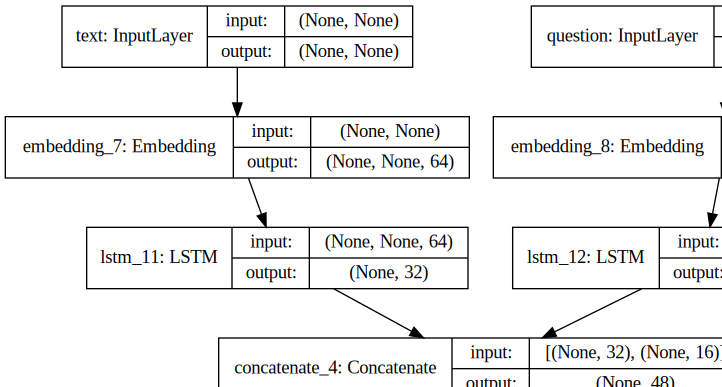

In [ ]:
model.summary()
SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))

Feeding data into Model

In [ ]:
#generates dummy data
num_samples = 1000 
max_length = 100

# Generates dummy Numpy data
text = np.random.randint(1, text_vocabulary_size,size=(num_samples, max_length))
question = np.random.randint(1, question_vocabulary_size,size=(num_samples, max_length)) 
# Answers are one-hot encoded, not integers
# answers = np.random.randint(0, 1,size=(num_samples, answer_vocabulary_size))
answers = np.random.randint(answer_vocabulary_size, size=(num_samples))
answers = to_categorical(answers, answer_vocabulary_size)

# Fitting using a list of inputs
print('-'*10,"First training run with list of NumPy arrays",'-'*60)
model.fit([text, question], answers, epochs=10, batch_size=128)
print()

# Fitting using a dictionary of inputs (only if inputs are named)
print('-'*10,"Second training run with dictionary and named inputs",'-'*60)
model.fit({'text': text, 'question': question}, answers,epochs=10, batch_size=128)

---------- First training run with list of NumPy arrays ------------------------------------------------------------
Epoch 1/10
1000/1000 [==============================] - 1s 1ms/step - loss: 6.2739 - acc: 0.0040
Epoch 2/10
1000/1000 [==============================] - 1s 1ms/step - loss: 6.1745 - acc: 0.0060
Epoch 3/10
1000/1000 [==============================] - 1s 1ms/step - loss: 6.1145 - acc: 0.0060
Epoch 4/10
1000/1000 [==============================] - 1s 1ms/step - loss: 6.0737 - acc: 0.0060
Epoch 5/10
1000/1000 [==============================] - 1s 1ms/step - loss: 6.0454 - acc: 0.0070
Epoch 6/10
1000/1000 [==============================] - 1s 1ms/step - loss: 6.0244 - acc: 0.0090
Epoch 7/10
1000/1000 [==============================] - 1s 1ms/step - loss: 6.0103 - acc: 0.0090
Epoch 8/10
1000/1000 [==============================] - 1s 1ms/step - loss: 5.9998 - acc: 0.0090
Epoch 9/10
1000/1000 [==============================] - 1s 1ms/step - loss: 5.9910 - acc: 0.0090
Epoch 10/1

Multi Output Models

In [ ]:
vocabulary_size = 50000
num_income_groups = 10
#Designing Model
posts_input = Input(shape=(None,), dtype='int32', name='posts')
# embedded_posts = layers.Embedding(256, vocabulary_size)(posts_input) 
embedded_posts = layers.Embedding(vocabulary_size,256)(posts_input)
x = layers.Conv1D(128, 5, activation='relu', padding='same')(embedded_posts)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(256, 5, activation='relu', padding='same')(x)
x = layers.Conv1D(256, 5, activation='relu', padding='same')(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(256, 5, activation='relu', padding='same')(x)
x = layers.Conv1D(256, 5, activation='relu', padding='same')(x) 
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation='relu')(x) 

# Note that the output layers are given names.
age_prediction = layers.Dense(1, name='age')(x)
income_prediction = layers.Dense(num_income_groups, activation='softmax',name='income')(x)
gender_prediction = layers.Dense(1, activation='sigmoid', name='gender')(x)
model = Model(posts_input,[age_prediction, income_prediction, gender_prediction])

print("Model is ready!")

Model is ready!


Compilation options of a multi-output model: multiple losses

In [ ]:
model.compile(optimizer='rmsprop', loss=['mse', 'categorical_crossentropy', 'binary_crossentropy'])

# Equivalent (possible only if you give names to the output layers)
model.compile(optimizer='rmsprop',loss={'age': 'mse',
                                        'income': 'categorical_crossentropy',
                                        'gender': 'binary_crossentropy'})

Solution to imbalanced loss contributions

In [ ]:
# Equivalent (possible only if you give names to the output layers)
model.compile(optimizer='rmsprop',
              loss={'age': 'mse','income': 'categorical_crossentropy','gender': 'binary_crossentropy'},
              loss_weights={'age': 0.25,
                            'income': 1.,
                            'gender': 10.})

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
posts (InputLayer)              (None, None)         0                                            
__________________________________________________________________________________________________
embedding_13 (Embedding)        (None, None, 256)    12800000    posts[0][0]                      
__________________________________________________________________________________________________
conv1d_21 (Conv1D)              (None, None, 128)    163968      embedding_13[0][0]               
__________________________________________________________________________________________________
max_pooling1d_9 (MaxPooling1D)  (None, None, 128)    0           conv1d_21[0][0]                  
___________________________________________________________________________________________

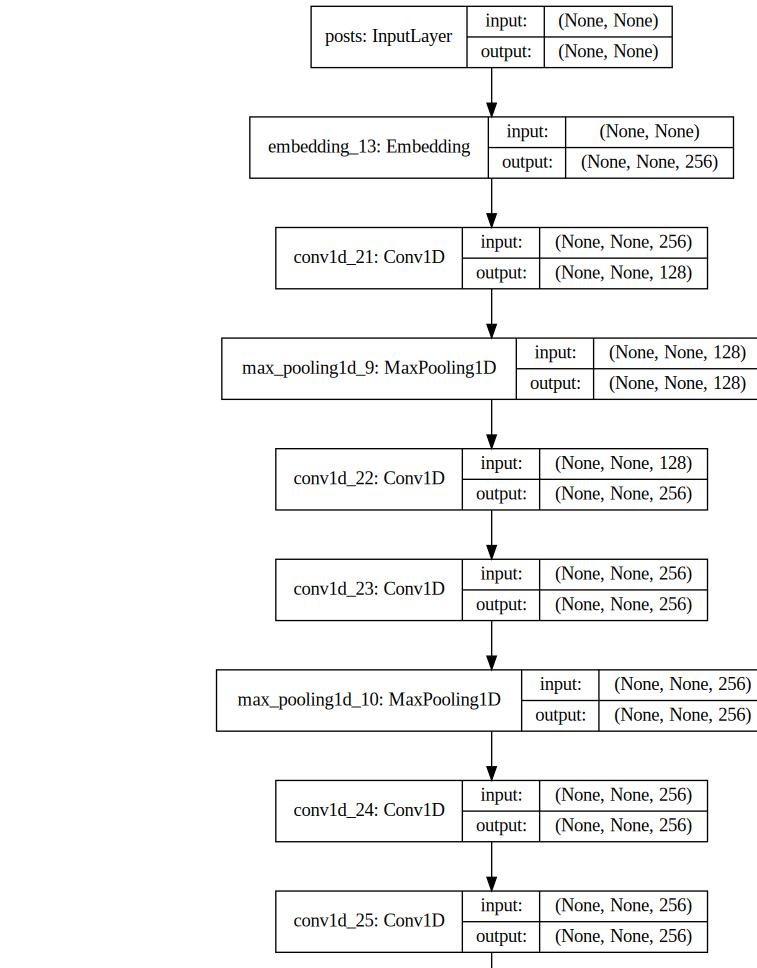

In [ ]:
model.summary()

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))

In [ ]:
#generating data
TRACE = False

num_samples = 1000 
max_length = 100 

posts = np.random.randint(1, vocabulary_size, size=(num_samples, max_length))
if TRACE:
    print("*** POSTS ***")
    print(posts.shape)
    print(posts[:10])
    print()

age_targets = np.random.randint(0, 100, size=(num_samples,1))
if TRACE:
    print("*** AGE ***")
    print(age_targets.shape)
    print(age_targets[:10])
    print()

income_targets = np.random.randint(1, num_income_groups, size=(num_samples,1))
income_targets = to_categorical(income_targets,num_income_groups)
if TRACE:
    print("*** INCOME ***")
    print(income_targets.shape)
    print(income_targets[:10])
    print()

gender_targets = np.random.randint(0, 2, size=(num_samples,1))
if TRACE:
    print("*** GENDER ***")
    print(gender_targets.shape)
    print(gender_targets[:10])
    print()

print('-'*10, "First training run with NumPy arrays", '-'*60)
# age_targets, income_targets, and gender_targets are assumed to be Numpy arrays.

#fitting model
model.fit(posts, [age_targets, income_targets, gender_targets], epochs=10, batch_size=64)

print('-'*10,"Second training run with dictionary and named outputs",'-'*60)

---------- First training run with NumPy arrays ------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/10
1000/1000 [==============================] - 9s 9ms/step - loss: 504.8411 - age_loss: 1917.1328 - income_loss: 8.2259 - gender_loss: 1.1619
Epoch 2/10
1000/1000 [==============================] - 8s 8ms/step - loss: 165.2228 - age_loss: 627.4891 - income_loss: 4.3864 - gender_loss: 0.8376
Epoch 3/10
1000/1000 [==============================] - 8s 8ms/step - loss: 190.4757 - age_loss: 709.6337 - income_loss: 2.7044 - gender_loss: 0.9027
Epoch 4/10
1000/1000 [==============================] - 8s 8ms/step - loss: 134.2041 - age_loss: 490.1766 - income_loss: 2.2693 - gender_loss: 0.7927
Epoch 5/10
1000/1000 [==============================] - 8s 8ms/step - loss: 127.1711 - age_loss: 462.7672 - income_loss: 2.2671 - gender_loss: 0.8266
Epoch 6/10
1000/1000 [==============================] - 8s 8ms/step - loss: 111.0557 - age_loss: 392.2523 - income_loss: 2.3356 - gender_loss: 0.9390
Epoch 7/10
1000/1000 [==============================] - 8s 8ms/step - loss: 96.3329 - age_loss: 355